# <center><font color='MediumSeaGreen'> _Módulo Machine Learning G45_</font>
# <center><font color='MediumSeaGreen'> Desafío guiado - Regularización </font>
## <center> _Algoritmos de clasificación (Parte I)_ 
    
### <center><b> Bárbara Pérez </b><center>
    
    

___

## <font color='MediumSeaGreen'>Descripción</font>

- En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump dentro del
proyecto.
- Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
- En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a partir de la letra de una canción.
- Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes

___________

## <font color='MediumSeaGreen'>Ejercicio 1: Preparación del Ambiente de Trabajo</font>

- Importe los módulos <span style='background:gainsboro'><font color='dimgray'>numpy</font></span>, <span style='background:gainsboro'><font color='dimgray'>pandas</font></span>, <span style='background:gainsboro'><font color='dimgray'>matplotlib</font></span>, <span style='background:gainsboro'><font color='dimgray'>seaborn</font></span>, <span style='background:gainsboro'><font color='dimgray'>glob</font></span> y <span style='background:gainsboro'><font color='dimgray'>os</font></span> siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.
- Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando <span style='background:gainsboro'><font color='dimgray'>glob.glob</font></span> y <span style='background:gainsboro'><font color='dimgray'>os.getcwd()</font></span> para extraer las rutas absolutas. Posteriormente generé un objeto <span style='background:gainsboro'><font color='dimgray'>pd.DataFrame</font></span> que contenga todos los <span style='background:gainsboro'><font color='dimgray'>csv</font></span>.
- Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
#librerías clásicas
import matplotlib.pyplot as plt #version 3.5.2
import pandas as pd  #version 1.4.3
import seaborn as sns  #version 0.11.2
import numpy as np  #version 1.23.0

#librerias para manejo de archivos a nivel de sistema operativo
import os
import glob

#librería para análisis exploratorio
import pandas_profiling #version 3.2.0


#librería para pre procesamiento
from sklearn.preprocessing import LabelEncoder

#librerias para modelamiento
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

#librerías para las métricas
from sklearn.metrics import roc_auc_score , roc_curve , confusion_matrix, classification_report


#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

#seteamos elementos cosméticos para los gráficos
sns.set_style("darkgrid")
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["figure.dpi"] = 100  # resolución gráficos

In [2]:
#importamos librerias para cambiar los tamaños de visualización del Jupyter
from IPython.display import display, HTML
#mejoramos la visualización
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
#agregamos javascript y link para mostrar/ocultar el código
HTML(
    '''
    <script>
    code_show=false; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <h4>
    Para ocultar/visualizar el código, presionar <a href="javascript:code_toggle()">AQUI</a>.</h4>
    '''
)

## Importamos otras funciones

In [3]:
#utilizamos la función del profesor para importar la data
def load_data(path):
   '''
   carga el dataset
   '''
   # Definiendo la carga de todos los datos
   all_files = glob.glob(path + "/*.csv")
   li = []
   for filename in all_files:
       file = pd.read_csv(filename, index_col=None, header=0)
       li.append(file)
   data = pd.concat(li, axis=0, ignore_index=True)
   return data

In [4]:
!pwd

/c/Users/barbie/Desktop/Desafio LAtam/3.- Machine Learning/2.- Algoritmo de ClasificaciÃ³n (Parte 1)/Clases - dÃ­a 1


In [5]:
#importamos la data
path = os.getcwd()+'/dump'
df=load_data(path)

In [6]:
# # obtenemos la lista de archivos en la carpeta dump
# file_list = glob.glob(os.getcwd() + '/dump/*.csv')
# append_csv = []
# for f in file_list:
#     append_csv.append(pd.read_csv(f, index_col=None, header=0).drop(columns='Unnamed: 0'))

# df_lyrics = pd.concat(append_csv)
# df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

In [7]:
#inspeccionamos el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9489 entries, 0 to 9488
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9489 non-null   object
 1   0           9489 non-null   object
 2   1           9489 non-null   object
 3   2           9489 non-null   object
 4   3           9489 non-null   object
dtypes: object(5)
memory usage: 370.8+ KB


In [8]:
df.head()

,Unnamed: 0,0,1,2,3
0,0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [9]:
#eliminamos la columna unnamed
df = df.drop(columns='Unnamed: 0')

In [10]:
#le asignamos nombres a las columnas
df.columns = ['artista','genero','cancion','letra']

In [11]:
#Observamos los cambios realizados
df.head()

,artista,genero,cancion,letra
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


_____________

## <font color='MediumSeaGreen'>Ejercicio 2: Descripción de los datos</font>

- Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    - La cantidad de canciones registradas por cada artista, ordenados de mayor a menor.
    - La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
- Comente sobre las principales tendencias

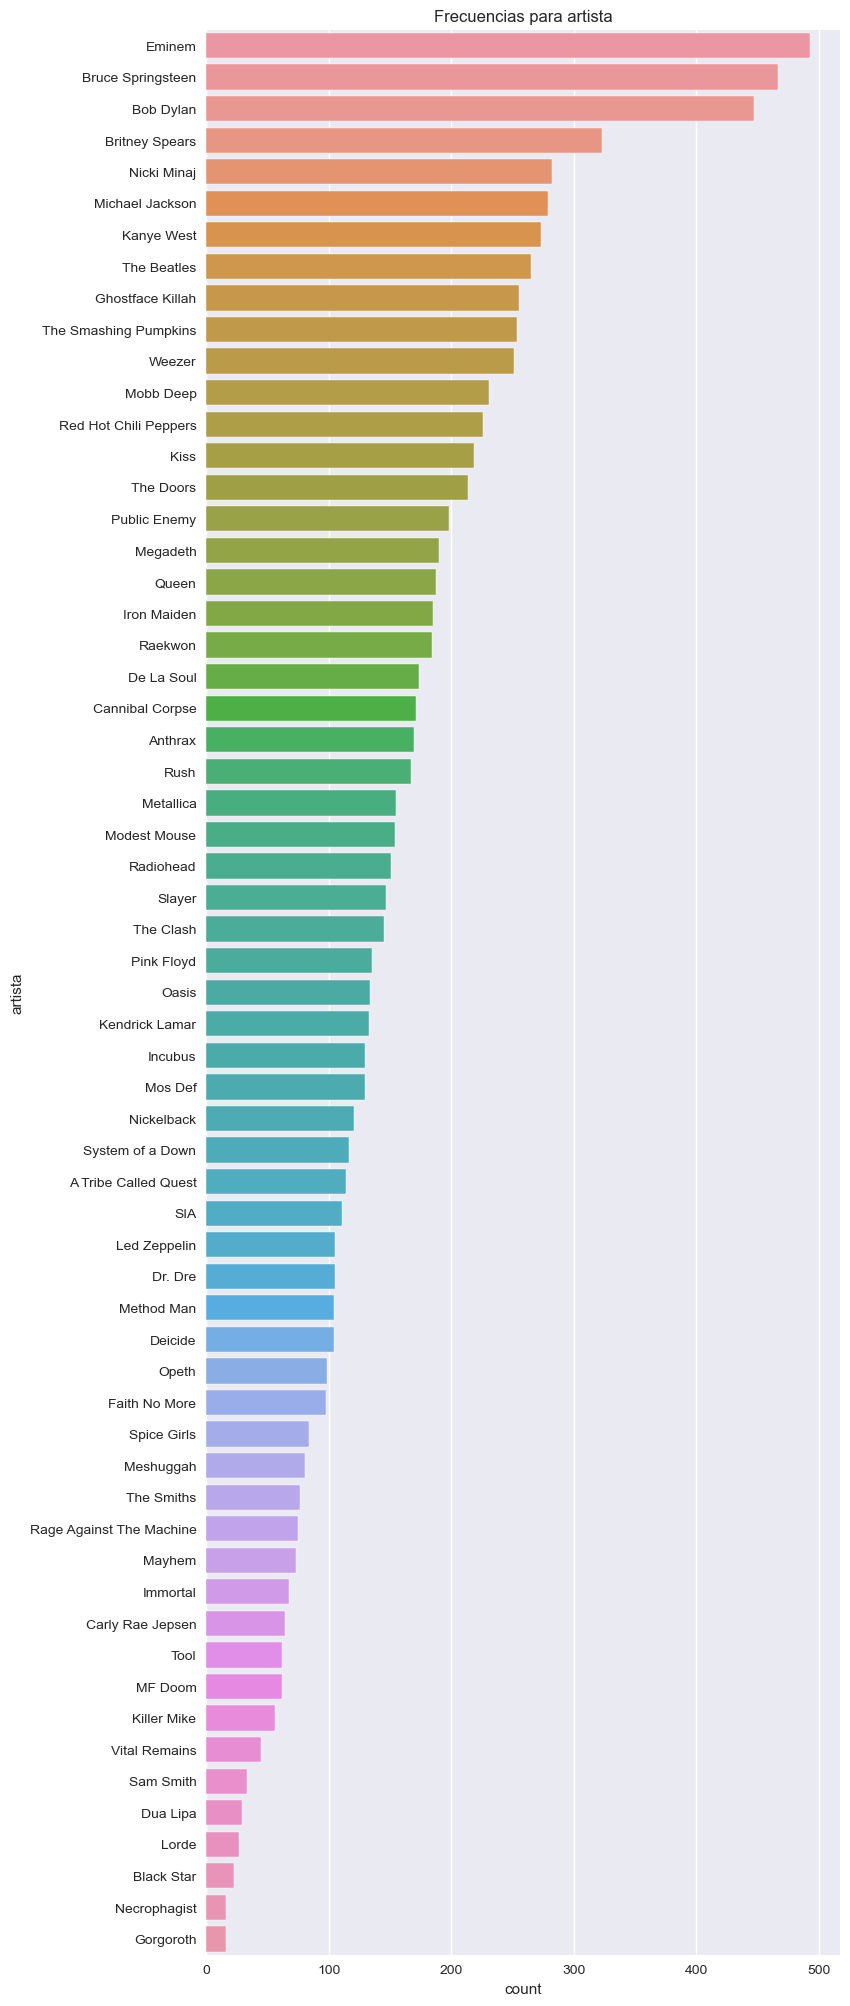

<Figure size 1000x1000 with 0 Axes>

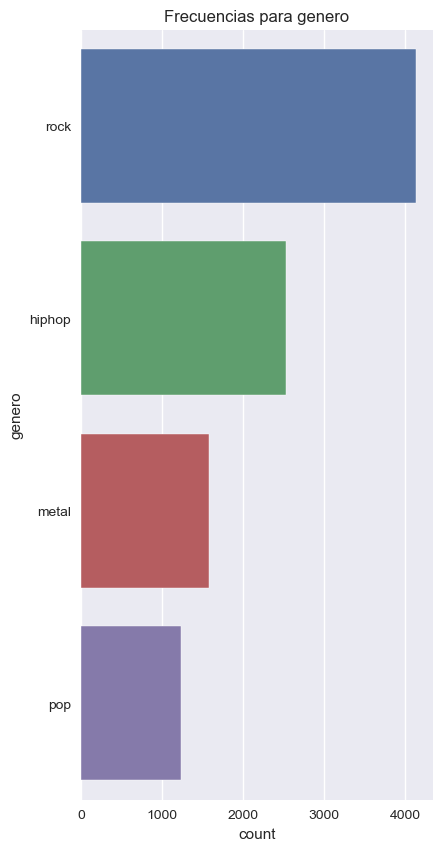

<Figure size 1000x1000 with 0 Axes>

In [12]:
#generamos los gráficos de barra solicitados resumiendo la cantida de canciones registradas por cada artista
#y la cantidad de canciones por género, ordenadas de mayor a menor 
plt.figure(figsize=(18, 25))
for n, i in enumerate(['artista', 'genero']):
    # generamos dos subplots en una fila
    plt.subplot(1, 2, n + 1)
    ax = sns.countplot(y=df[i], data=df, order= df[i].value_counts().index)
    plt.title(f'Frecuencias para {i}')
    plt.show()
    #agregamos los totales al final de la barra
    for p in ax.patches:
        total = f'{p.get_width():,}'.replace(',','.')
        x = p.get_x() + p.get_width() + 0.06
        y = p.get_y() + p.get_height()/2
        ax.annotate(total, (x, y))
    plt.tight_layout()
    plt.show()

Las principales tendencia por artistas son:

1. Eminem
2. Bruce Springsteen
3. Bob Dylan
4. Britney Spears
5. Nicki Minaj


Las principales tendencias de genero son:
1. Rock
2. Hiphop
3. Metal
4. Pop

__________

## <font color='MediumSeaGreen'>Ejercicio 3: Matriz de ocurrencias</font>

### <font color='Gray'>Digresión: Tokenización de Textos</font>

Para poder trabajar con textos, debemos pasarlos a una **matriz dispersa***, donde cada fila
representará una entrada (en este caso, una canción), y cada columna **representará una
palabra (token)**. Este es el proceso de tokenización: Identificar la ocurrencia de una palabra
específica dentro de un conjunto de textos (corpus).

El tokenizador más simple <span style='background:gainsboro'><font color='dimgray'> sklearn.feature_extraction.text.CountVectorizer </font></span> genera
una colección de textos a una matriz que representa la frecuencia **dentro del texto** de una
palabra específica.

El tokenizador funciona de la siguiente manera:

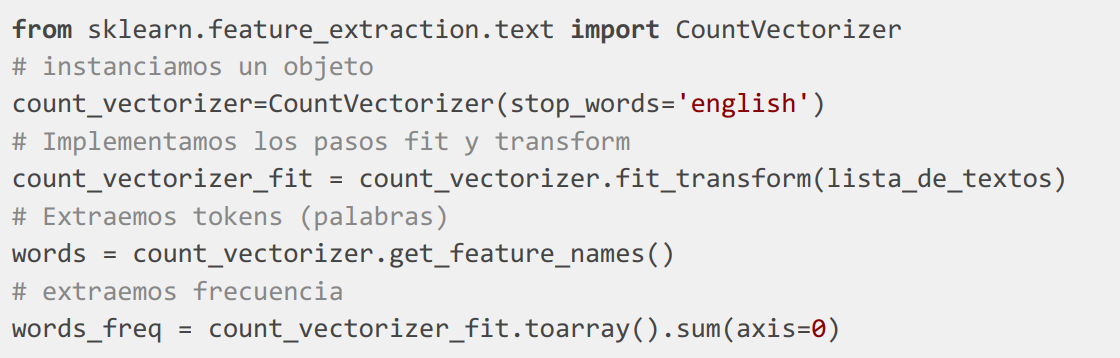

- Importe la clase <span style='background:gainsboro'><font color='dimgray'>CountVectorizer</font></span> dentro de los módulos <span style='background:gainsboro'><font color='dimgray'>feature_extraction.text</font></span>  de la librería <span style='background:gainsboro'><font color='dimgray'>sklearn</font></span>. Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
- Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
- Genere una función que replique el procedimiento para cada uno de los géneros.
- Comente sobre las principales características de cada género en cuanto a sus palabras.

In [13]:
#importamos la libreria solicitada
from sklearn.feature_extraction.text import CountVectorizer

#utilizamos y modificamos el ejemplo del desafío

# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')

# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df['letra'])

# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()

# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [14]:
#verificamos que la cantidad de palabras y frecuencias
print(f"Cantidad de palabras    => {len(words)}")
print(f"Cantidad de frecuencias => {len(words_freq)}")

Cantidad de palabras    => 49019
Cantidad de frecuencias => 49019


In [15]:
#creamos un df para las palabras y sus frecuencias
df_palabras = pd.DataFrame({'words': words,'words_freq': words_freq })

In [16]:
#revisamos el df
df_palabras.sample(5)

,words,words_freq
10199,crochet,1
245,313,43
3160,badunk,1
22787,jazzy,4
2986,azwethinkweism,1


In [17]:
#obtenemos las palabras mas frecuentes
df_palabras_mas_frecuentes = df_palabras.sort_values(by=['words_freq'], ascending=False).head(100)

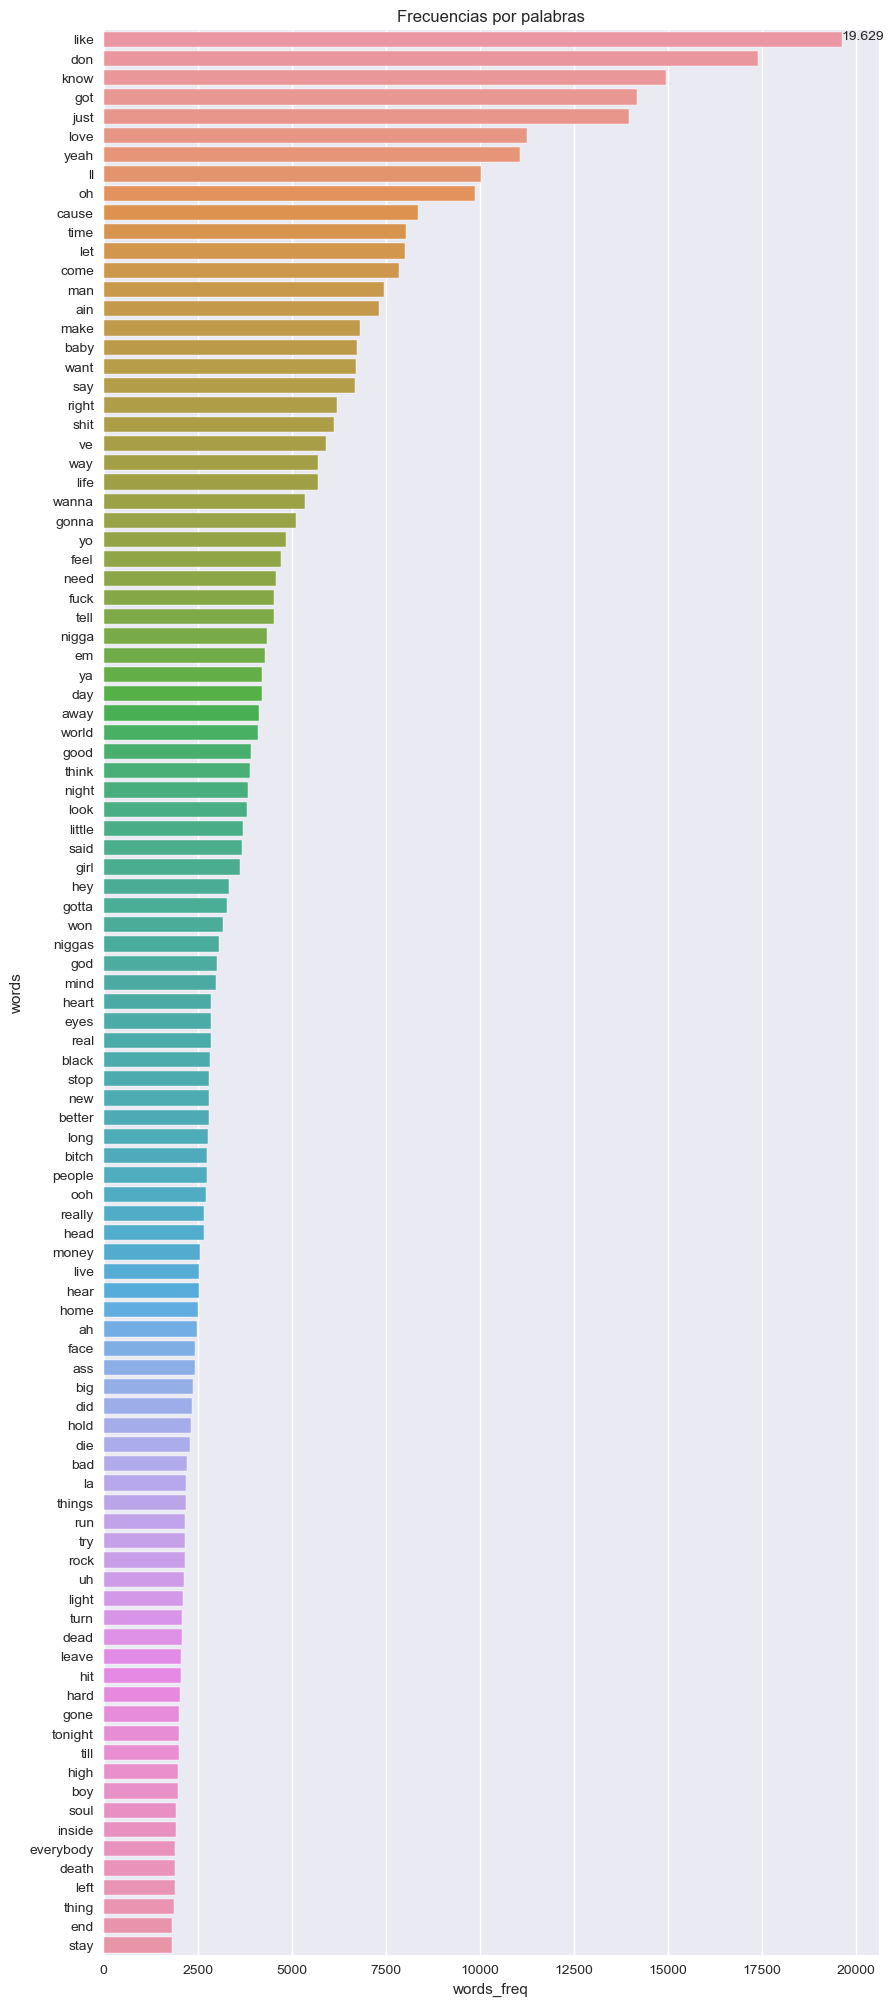

In [18]:
#seteamos el tamaño del gráfico que crearemos
plt.figure(figsize=(10, 25))

#creamos el gráfico de las palabras por frecuencia
ax = sns.barplot(y=df_palabras_mas_frecuentes['words'],
                 x=df_palabras_mas_frecuentes['words_freq'], data=df_palabras_mas_frecuentes)
plt.title(f'Frecuencias por palabras')
#agregamos los totales al final de la barra
for p in ax.patches:
    total = f'{int(p.get_width()):,}'.replace(',','.')
    x = p.get_x() + p.get_width() + 0.06
    y = p.get_y() + p.get_height()/2
    ax.annotate(total, (x, y))
    plt.show()

#### Crearemos la función solicitada


In [19]:
#creamos una función para obtener las palabras por género, en base a los ejemplos del expositor del módulo
def palabras_por_genero(df, genero):
    # instanciamos un objeto
    count_vectorizer=CountVectorizer(stop_words='english')
    # Implementamos los pasos fit y transform
    count_vectorizer_fit = count_vectorizer.fit_transform(df[df['genero']==genero]['letra'])
    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
    # extraemos las frecuencias por palabras
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    #creamos un df para la matrix de palabras por género
    df_palabras = pd.DataFrame({'words': words,'words_freq': words_freq })
    
    #obtenemos un df ordenado para las primeras 100 palabras mas frecuentes
    df_palabras_mas_frecuentes = df_palabras.sort_values(by=['words_freq'], ascending=False).head(100)
    
    #retornamos el df ordenado
    return df_palabras_mas_frecuentes
    
#creamos una función para graficar las palabras por género
def graficos_por_genero(df):
    plt.figure(figsize=(20, 25))
    generos = df['genero'].unique()
    for n, i in enumerate(generos):
        df_palabras_mas_frecuentes = palabras_por_genero(df, i)
        
        # generamos tantos subplots en una fila, como géneros existan
        plt.subplot(1, len(generos), n + 1)
        
        #creamos el gráfico para el género
        ax = sns.barplot(y=df_palabras_mas_frecuentes['words'],
                         x=df_palabras_mas_frecuentes['words_freq'],
                         data=df_palabras_mas_frecuentes)
        plt.title(f'Frecuencias por palabra para {i}')
        #agregamos los totales al final de la barra
        for p in ax.patches:
            total = f'{int(p.get_width()):,}'.replace(',','.')
            x = p.get_x() + p.get_width() + 0.06
            y = p.get_y() + p.get_height()/2
            ax.annotate(total, (x, y))        
plt.show()

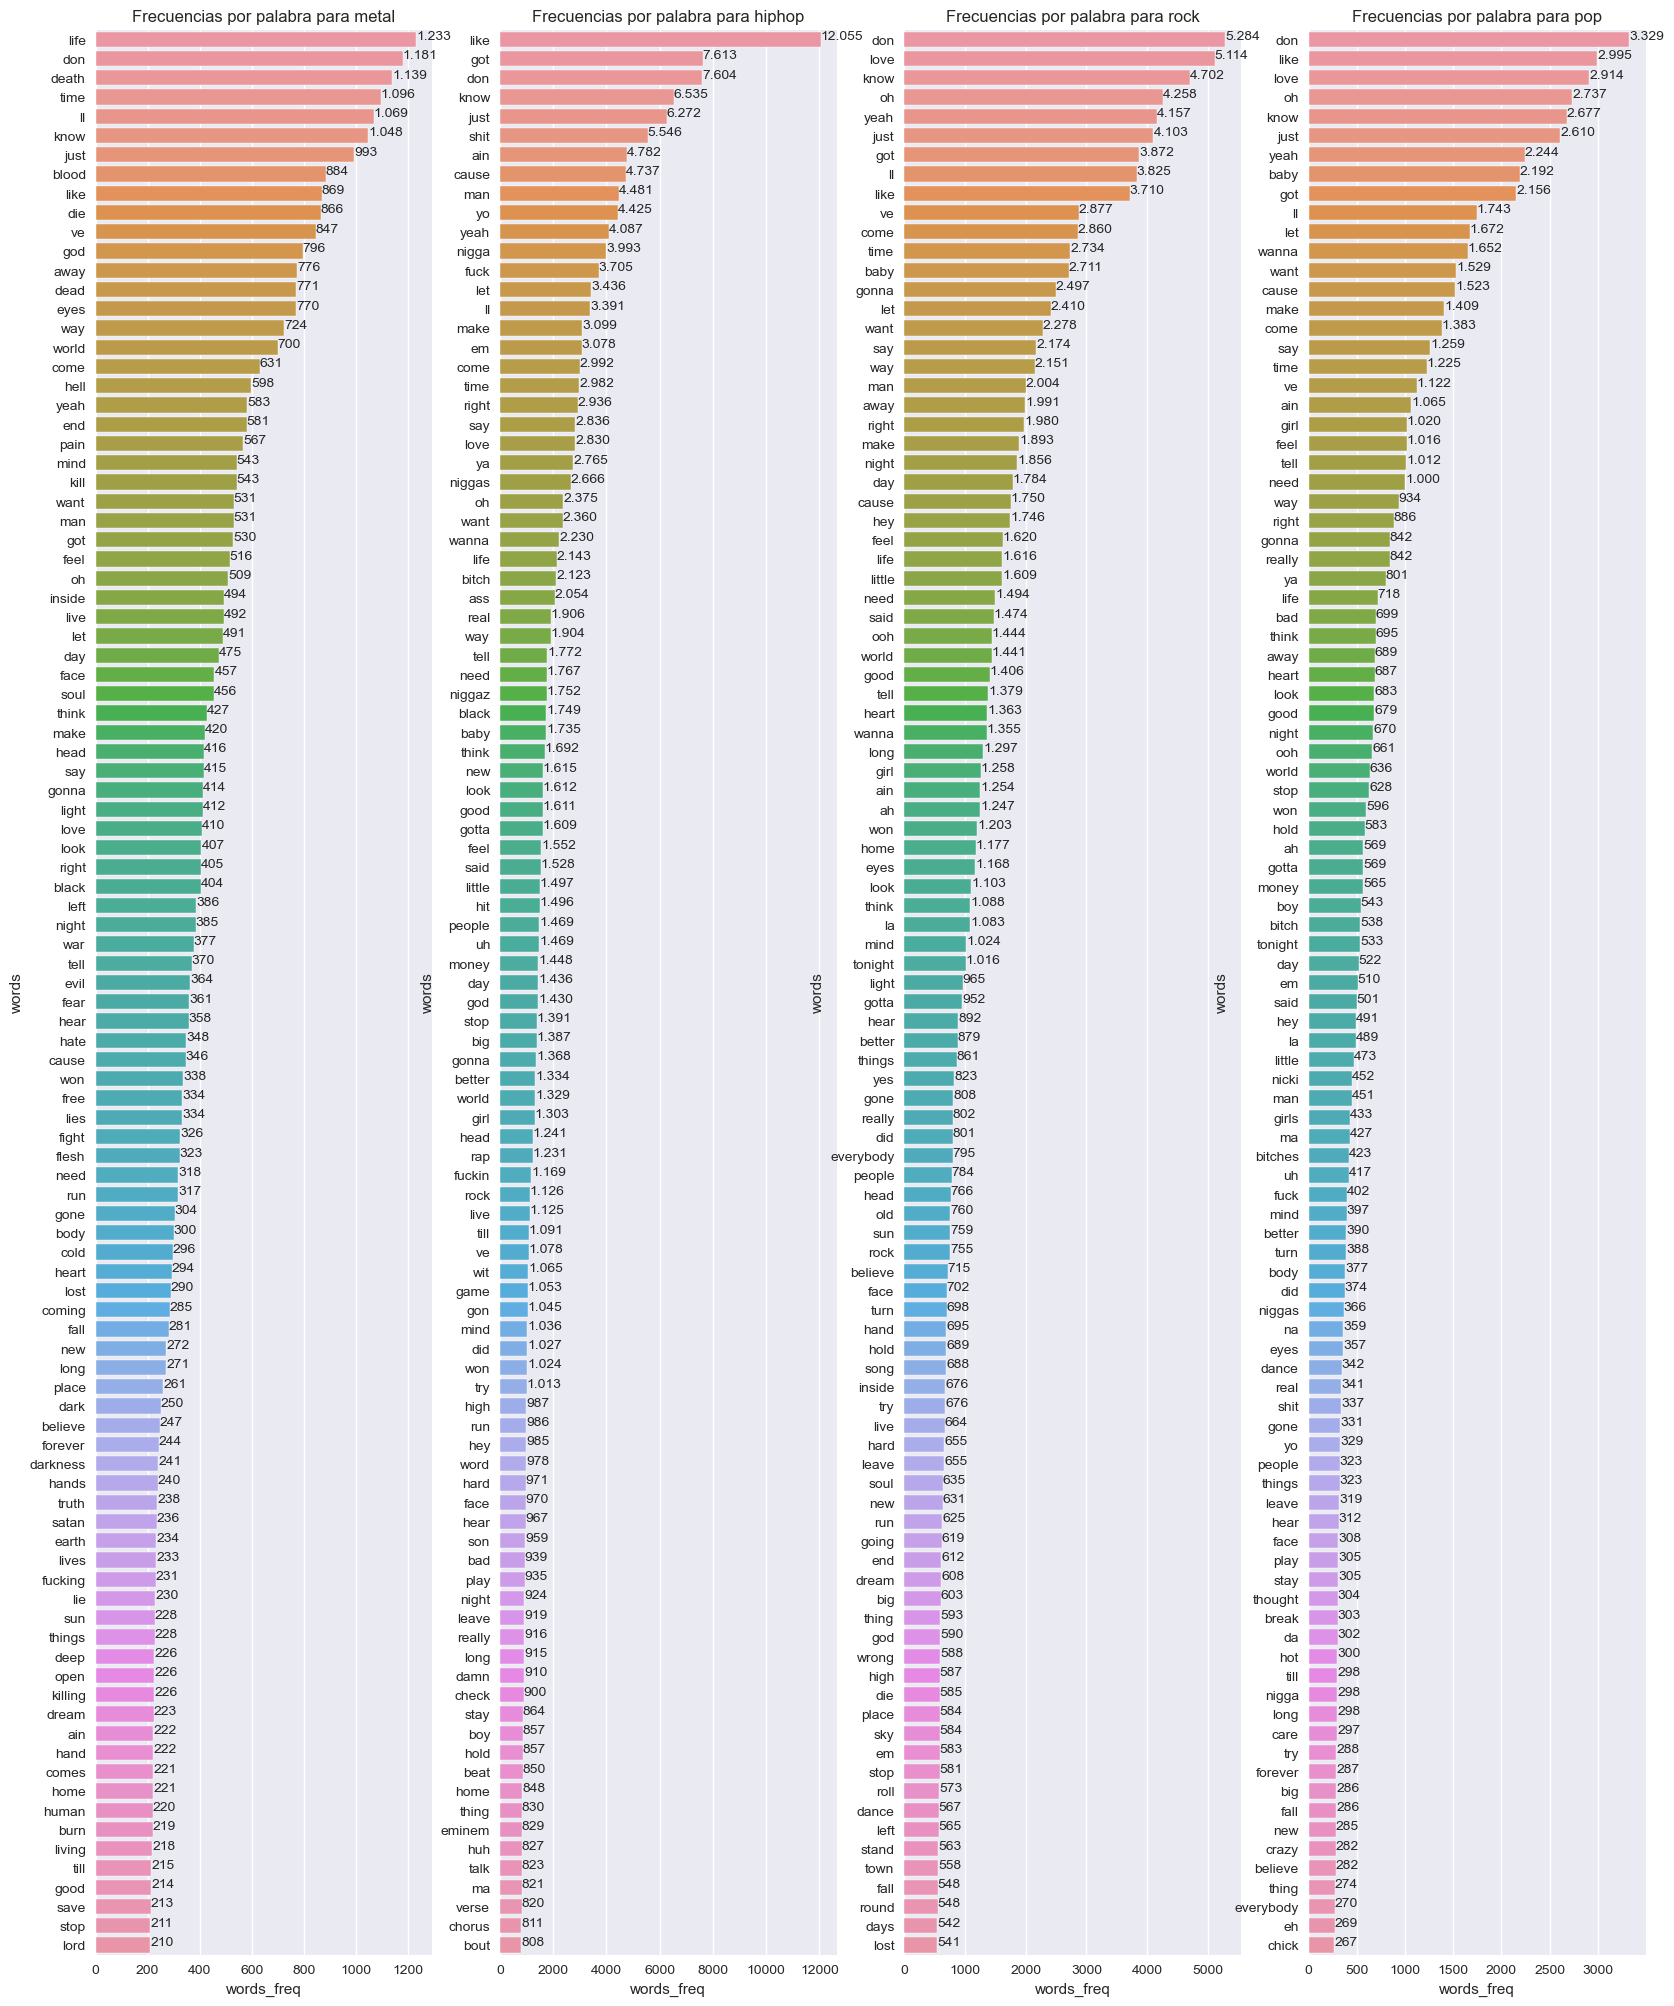

In [20]:
#visualizamos los gráficos
graficos_por_genero(df)

- La palabra *'lik'e* es una de las palabras que más se repite en los 4 generos estudiados.

- La palabra *'don't'* es una palabra que se encuentra dentro de las primeras tres mas frecuentes en los 4 generos

- En los generos ***pop*** y ***rock*** las palabras más repetidas corresponden a las mismas palabras

- Por las letras más repetidas en el genero ***metal***, este pareciera enfocarse en la vida y muerta, sangre y justicia.

- Por las letras más repetidas en el genero ***HipHop***, este pareciera enfocarse en el pueblo de piel oscura, de justicia y la rabia que tienen en la sociedad que viven.

- Por las letras más repetidas en el genero ***Rock***, este pareciera enfocarse en el amor, en el gustar de otro, probablemente reclaciones de pareja.

- Por las letras más repetidas en el genero ***Pop***, este pareciera enfocarse en el amor, muy parecido al rock.

________

## <font color='MediumSeaGreen'>Ejercicio 4: Entrenamiento del Modelo</font>

### <font color='Gray'>Digresión: <span style='background:gainsboro'><font color='dimgray'>sklearn</font></span> Pipelines</font>

La clase <span style='background:gainsboro'><font color='dimgray'>Pipeline</font></span> del módulo <span style='background:gainsboro'><font color='dimgray'>sklearn.pipeline</font></span> permite concatenar múltiples pasos de procesamiento y preprocesamiento en un estimador generado por algún método de <span style='background:gainsboro'><font color='dimgray'>scikit-learn</font></span>. En sí, la clase cuenta con los métodos clásicos <span style='background:gainsboro'><font color='dimgray'>fit</font></span>, <span style='background:gainsboro'><font color='dimgray'>predict</font></span> y <span style='background:gainsboro'><font color='dimgray'>score</font></span> y presenta un comportamiento idéntico a los demás objetos de scikit-learn. Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.

### <font color='Gray'>Componentes de un <span style='background:gainsboro'><font color='dimgray'>Pipeline</font></span>

Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo **Estandarizar**, posteriormente **extraer sus principales componentes** y finalmente aplicar un modelo de **regresión lineal**. Este flujo se puede reexpresar como:

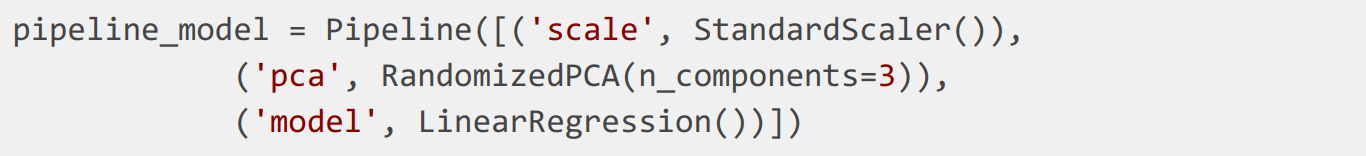

Algunos de los elementos a considerar:

1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la función a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que asociamos el método <span style='background:gainsboro'><font color='dimgray'>StandardScaler</font></span> con el string <span style='background:gainsboro'><font color='dimgray'>scale</font></span>.

2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso representa el orden de ejecución.

Posteriormente el objeto creado puede utilizarse con los siguientes métodos:

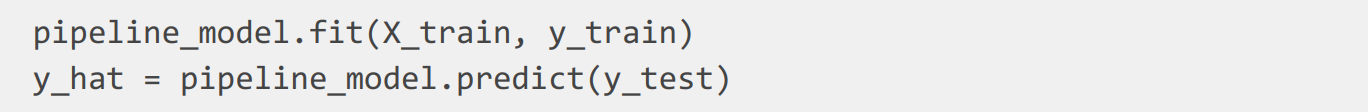

- Importe <span style='background:gainsboro'><font color='dimgray'>MultinomialNB</font></span>, <span style='background:gainsboro'><font color='dimgray'>train_test_split</font></span>, <span style='background:gainsboro'><font color='dimgray'>Pipeline</font></span>, <span style='background:gainsboro'><font color='dimgray'>confusion_matrix</font></span> y <span style='background:gainsboro'><font color='dimgray'>classification_report</font></span>.
- Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
- Monte el modelo dentro de un <span style='background:gainsboro'><font color='dimgray'>Pipeline</font></span>, donde el primer paso es implementar <span style='background:gainsboro'><font color='dimgray'>CountVectorizer</font></span> y el segundo es ejecutar el clasificador <span style='background:gainsboro'><font color='dimgray'>MultinomialNB</font></span>.
- A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

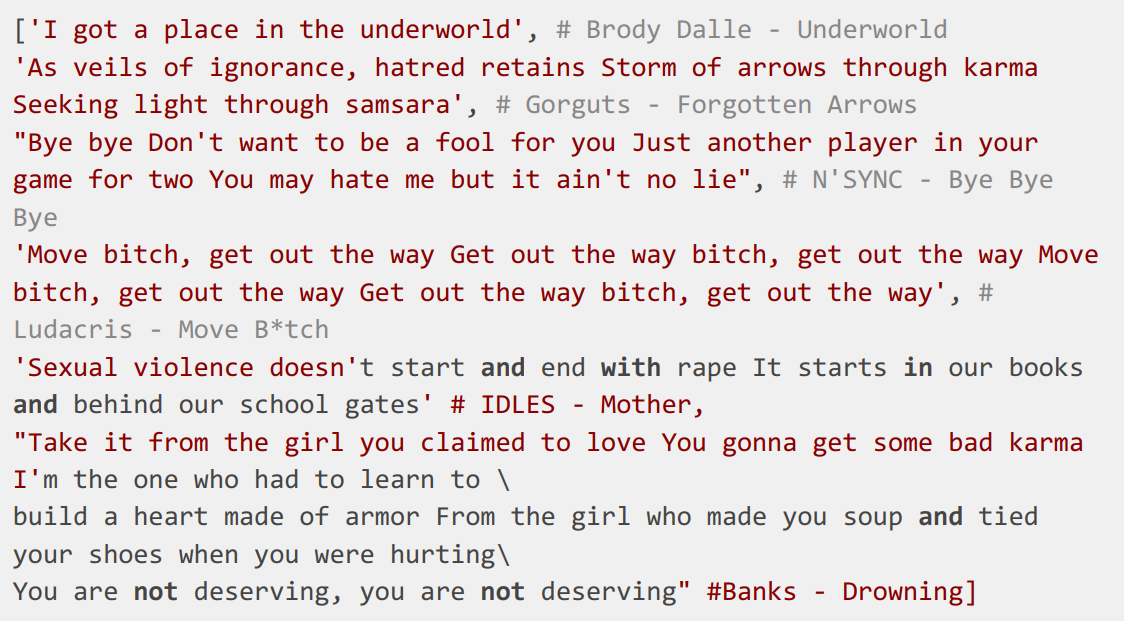

- Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [21]:
#importamos las librerías solicitadas
from sklearn import pipeline
from sklearn.naive_bayes import MultinomialNB

#NOTA: train_test_split, confusion_matrix y classification_report
#ya se importaron previamente

In [22]:
#creamos un pipeline acorede al desafío
pipeline_model = pipeline.Pipeline(
    [
        ('count_vectorizer', CountVectorizer(stop_words='english')),
        ('multinomial', MultinomialNB ())
    ]
)

In [23]:
#revisamos el pipeline
pipeline_model

Pipeline(steps=[('count_vectorizer', CountVectorizer(stop_words='english')),
                ('multinomial', MultinomialNB())])

In [24]:
#dividimos la data
X = df['letra'] #definimos X como el vector con las letras de las canciones
y = df['genero'] #definimos género como vector objetivo

#separamos la data en los subsets de entrenamiento y validación,
#reservando un 40% para validación acorde a lo solicitado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2700)

In [25]:
#montamos el modelo dentro del pipeline, y lo entrenamos
pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer(stop_words='english')),
                ('multinomial', MultinomialNB())])

In [26]:
#obtenemos el texto del desafío
texto = [
        'I got a place in the underworld',
        'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara',
        "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", 
        'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', 
        'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates',
        "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" 
    ]

In [27]:
#predecimos el género sobre el texto del desafío
predicciones_texto = pipeline_model.predict(texto)
print(predicciones_texto)

['rock' 'metal' 'rock' 'pop' 'metal' 'rock']


In [28]:
#obtenemos nuestras predicciones sobre X_test
y_hat = pipeline_model.predict(X_test)

In [29]:
#visualizamos la matrix de confusión
confusion_matrix(y_test, y_hat)

array([[ 904,    6,   14,   59],
       [  22,  443,    8,  152],
       [  76,   11,  170,  258],
       [  66,   69,   67, 1471]], dtype=int64)

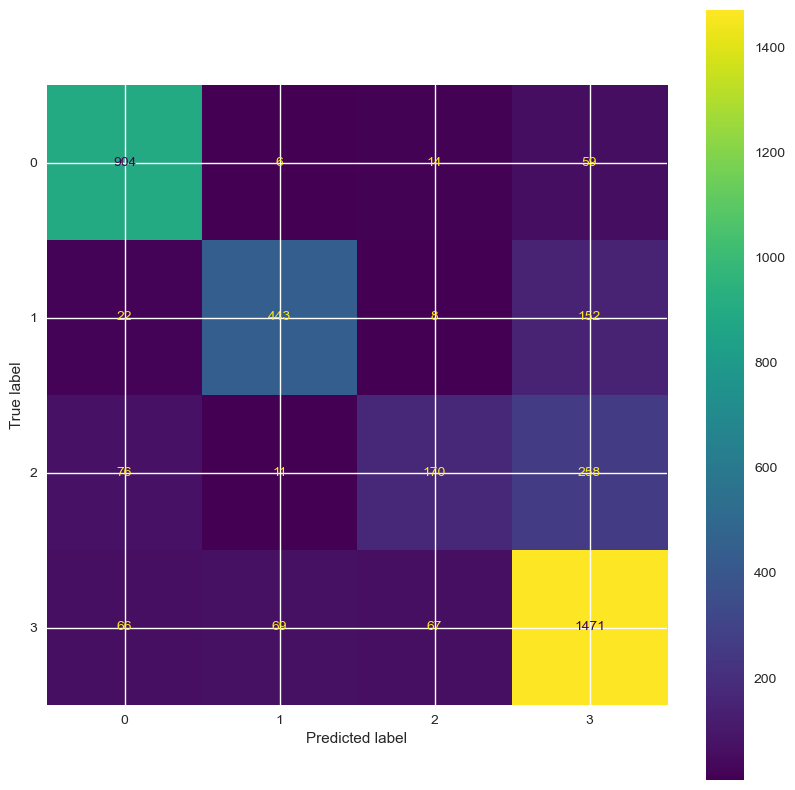

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [31]:
#revisamos las métricas de la predicción
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

      hiphop       0.85      0.92      0.88       983
       metal       0.84      0.71      0.77       625
         pop       0.66      0.33      0.44       515
        rock       0.76      0.88      0.81      1673

    accuracy                           0.79      3796
   macro avg       0.77      0.71      0.73      3796
weighted avg       0.78      0.79      0.77      3796



Se observa una muy alta ocurrencia de falsos positivos y falsos negativos en el género '***pop***' 

In [32]:
#creamos una matrix de confusión en base a las predicciones
confusion_matrix(y_test, y_hat)

array([[ 904,    6,   14,   59],
       [  22,  443,    8,  152],
       [  76,   11,  170,  258],
       [  66,   69,   67, 1471]], dtype=int64)

Dado el mal resultado de las métricas del género '***pop***', se propone:
- Aumentar la cantidad de datos, por lo que se revisará la segunda carpeta contenida en el desafío 'dump_plus_pop' para determinar si contiene mayor información
*  Aumentar el procentajes de datos destinados a entrenamiento a un 70%  

_______

## <font color='MediumSeaGreen'>Ejercicio 5: Mejora del Modelo</font>

- Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
- Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
- Comente sobre el desempeño general de este.

In [33]:
#revisamos la cantidad 
#importamos la data
path = os.getcwd()+'/dump_plus_pop'
df_nuevo=load_data(path)

In [34]:
#inspeccionamos el nuevo df
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10804 non-null  object
 1   0           10804 non-null  object
 2   1           10804 non-null  object
 3   2           10804 non-null  object
 4   3           10804 non-null  object
dtypes: object(5)
memory usage: 422.2+ KB


In [35]:
#eliminamos la columna unnamed
df_nuevo = df_nuevo.drop(columns='Unnamed: 0')

In [36]:
#le asignamos nombres a las columnas
df_nuevo.columns = ['artista','genero','cancion','letra']

In [37]:
#revisamos la data
df_nuevo.sample(10)

,artista,genero,cancion,letra
7528,Public Enemy,hiphop,World Tour Sessions,"Behold, the whole planet upside down \n I put ..."
6114,Mobb Deep,hiphop,One Of Ours Part II,"You know, situation like this \n Sometimes you..."
6646,Nickelback,rock,Too Bad,Father's hands are lined with dirt \n From lon...
2706,Eminem,hiphop,Under The Influence,"Chem-le-le-le-le-le-le-le, le-le, le-le \n Che..."
8167,Rage Against The Machine,rock,Year Of Tha Boomerang,"Unfortunately, we are not licensed to display ..."
2671,Eminem,hiphop,My Name Is,Hi! My name is... (What?) My name is... \n (Wh...
6602,New Kids On The Block,pop,Jealous (Blue),"Your smile, oh, your eyes, \n They light up, t..."
9766,The Smashing Pumpkins,rock,Hello Kitty Kat,"Say hello, before you say goodbye \n I should ..."
177,Ariana Grande,pop,The Way,Mac Miller: \n What we gotta do right here is ...
46,Anthrax,metal,Protest And Survive,The savage mutilation of the human race \n Is ...


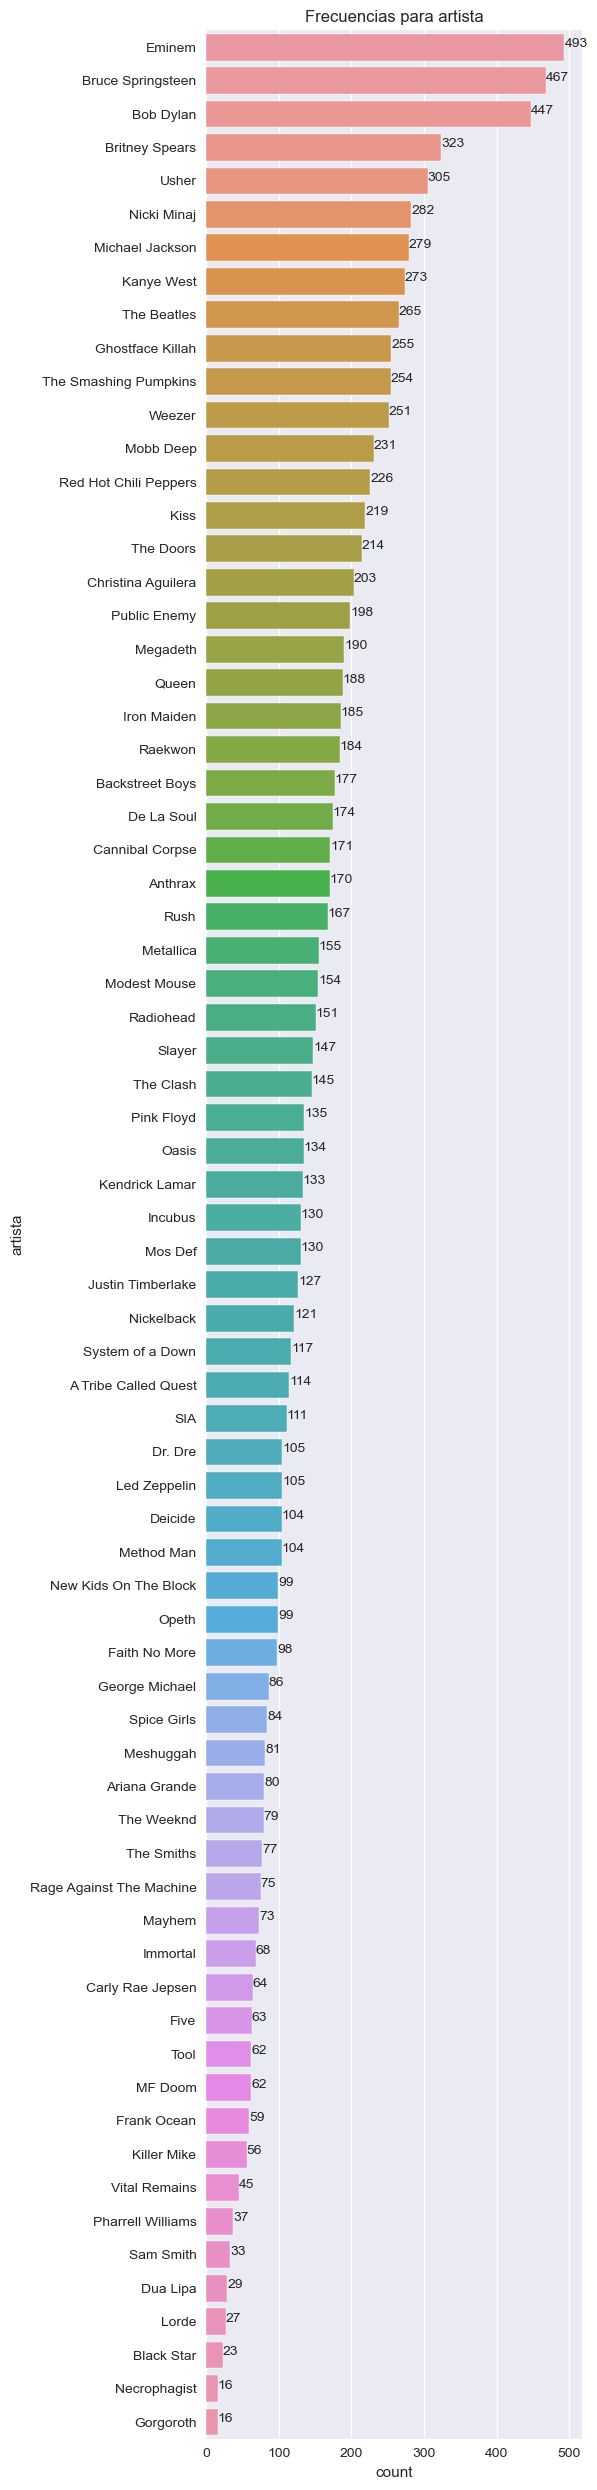

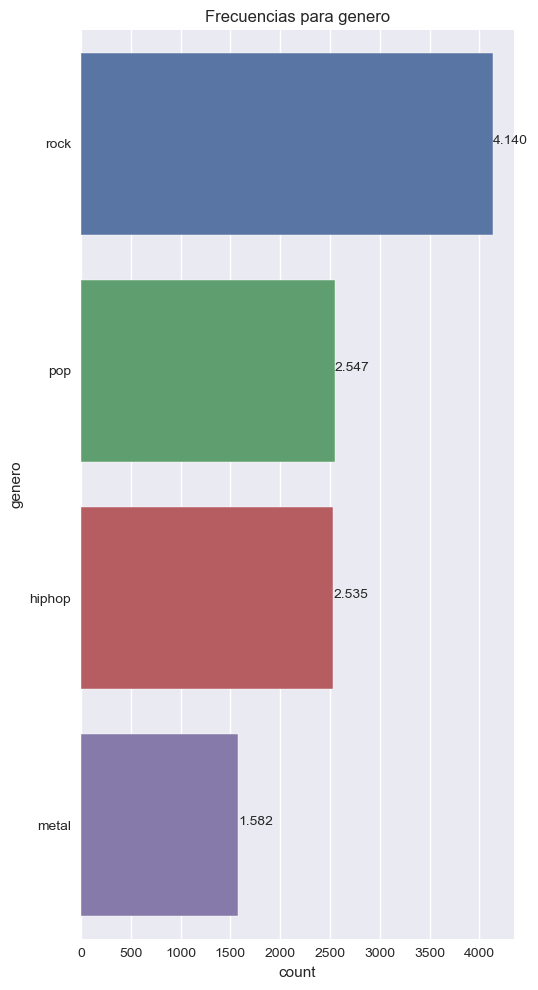

In [38]:
#generamos los gráficos de barra solicitados resumiendo la cantida de canciones registradas por cada artista
#y la cantidad de canciones por género, ordenadas de mayor a menor 
plt.figure(figsize=(10, 25))

for n, i in enumerate(['artista', 'genero']):
    # generamos dos subplots en una fila
    plt.subplot(1, 2, n + 1)
    ax = sns.countplot(y=df_nuevo[i], data=df_nuevo, order= df_nuevo[i].value_counts().index)
    plt.title(f'Frecuencias para {i}')
   
    #agregamos los totales al final de la barra
    for p in ax.patches:
        total = f'{p.get_width():,}'.replace(',','.')
        x = p.get_x() + p.get_width() + 0.06
        y = p.get_y() + p.get_height()/2
        ax.annotate(total, (x, y))
    plt.tight_layout()
    plt.show()

Se observa que este nuevo df efectivamente contiene mayor información, con la misma estructura del anterior

In [39]:
#separamos la data para entrenamiento y validación
X_nuevo = df_nuevo['letra'] #definimos X como el vector con las letras de las canciones
y_nuevo = df_nuevo['genero'] #definimos género como vector objetivo

#separamos la data en los subsets de entrenamiento y validación,
#reservando un 40% para validación acorde a lo solicitado
X_train_nuevo, X_test_nuevo, y_train_nuevo, y_test_nuevo = train_test_split(X_nuevo,
                                                                            y_nuevo,
                                                                            test_size = 0.3,
                                                                            random_state = 1234)

In [40]:
#montamos el nuevo modelo dentro del pipeline, y lo entrenamos
pipeline_model_nuevo = pipeline_model.fit(X_train_nuevo, y_train_nuevo)

In [41]:
#obtenemos y_hat para revisar las métricas
y_hat_nuevo = pipeline_model_nuevo.predict(X_test_nuevo)

In [42]:
#revisamos las métricas del nuevo modelo y las contrastamos con las del antiguo modelo
print(f"Métricas del \033[1mnuevo modelo\033[0m\n", classification_report(y_test_nuevo,y_hat_nuevo), "\n")
print(f"Métricas del \033[1mantiguo modelo\033[0m\n", classification_report(y_test,y_hat))

Métricas del nuevo modelo
               precision    recall  f1-score   support

      hiphop       0.81      0.90      0.85       736
       metal       0.84      0.72      0.78       499
         pop       0.68      0.68      0.68       781
        rock       0.75      0.75      0.75      1226

    accuracy                           0.76      3242
   macro avg       0.77      0.76      0.76      3242
weighted avg       0.76      0.76      0.76      3242
 

Métricas del antiguo modelo
               precision    recall  f1-score   support

      hiphop       0.85      0.92      0.88       983
       metal       0.84      0.71      0.77       625
         pop       0.66      0.33      0.44       515
        rock       0.76      0.88      0.81      1673

    accuracy                           0.79      3796
   macro avg       0.77      0.71      0.73      3796
weighted avg       0.78      0.79      0.77      3796



Se observan métricas mas estables para el modelo construido sobre esta nueva data, con una disminución considerable de los falsos positivos y falsos negativos en la categoría '***pop***', manteniéndose en general para las demás clases las métricas mostradas en el modelo anterior.

#### Compararemos las predicciónes del antiguo y el nuevo modelo sobre el texto del desafío

In [43]:
#revisamos la predicción del nuevo modelo sobre el texto
predicciones_texto_nuevo_modelo = pipeline_model_nuevo.predict(texto)

In [44]:
#comparamos los resultados entre los modelos
print(f"Predicciones del texto realizadas con el \033[1mmodelo antiguo\033[0m => {predicciones_texto}")
print(f"Predicciones del texto realizadas con el \033[1mnuevo modelo\033[0m   => {predicciones_texto_nuevo_modelo}")

Predicciones del texto realizadas con el modelo antiguo => ['rock' 'metal' 'rock' 'pop' 'metal' 'rock']
Predicciones del texto realizadas con el nuevo modelo   => ['rock' 'metal' 'pop' 'pop' 'metal' 'rock']


Se aprecian diferencias en las predicciones realizadas sobre el texto del desafío

In [45]:
#creamos una matrix de confusión
cnf_nuevo = confusion_matrix(y_test_nuevo, y_hat_nuevo) / len(y_test_nuevo)
cnf_nuevo

array([[0.2051203 , 0.0006169 , 0.01233806, 0.0089451 ],
       [0.00709439, 0.11135102, 0.00462677, 0.03084516],
       [0.02375077, 0.00185071, 0.16286243, 0.05243677],
       [0.01696484, 0.01943245, 0.0592227 , 0.28254164]])

<AxesSubplot:>

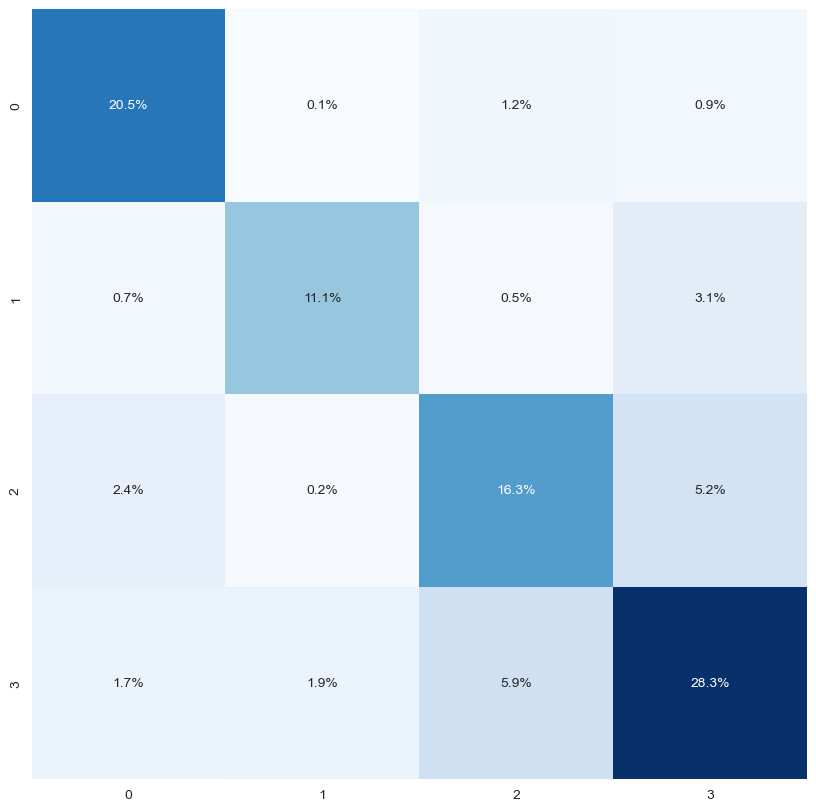

In [46]:
#visualizamos la matrix de confusión en un heatmap, como porcentaje de la categoría sobre el total
target_label = ['hiphop','metal','pop','rock']
sns.heatmap(cnf_nuevo, annot=True, fmt=".1%", cbar=False, cmap='Blues',
           xticklabels=True, yticklabels=True)

___________